In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
import pandas as pd
cuenta = pd.read_csv("Data/account_activity.csv")
cliente = pd.read_csv("Data/customer_data.csv")
fraude = pd.read_csv("Data/fraud_indicators.csv")
clienteSospechoso = pd.read_csv("Data/suspicious_activity.csv")
comerciante = pd.read_csv("Data/merchant_data.csv")
tran_cat = pd.read_csv("Data/transaction_category_labels.csv")
tran_cantidad = pd.read_csv("Data/amount_data.csv")
anomalia = pd.read_csv("Data/anomaly_scores.csv")
tran_data = pd.read_csv("Data/transaction_metadata.csv")
tran_historial = pd.read_csv("Data/transaction_records.csv")

In [173]:
tran_data['Timestamp'] = pd.to_datetime(tran_data['Timestamp'])
print(tran_data.info())
tran_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  1000 non-null   int64         
 1   Timestamp      1000 non-null   datetime64[ns]
 2   MerchantID     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 23.6 KB
None


,TransactionID,Timestamp,MerchantID
0,1,2022-01-01 00:00:00,2701
1,2,2022-01-01 01:00:00,2070
2,3,2022-01-01 02:00:00,2238
3,4,2022-01-01 03:00:00,2879
4,5,2022-01-01 04:00:00,2966
...,...,...,...
995,996,2022-02-11 11:00:00,2150
996,997,2022-02-11 12:00:00,2888
997,998,2022-02-11 13:00:00,2037
998,999,2022-02-11 14:00:00,2629


In [175]:

tran_data['Timestamp'] = pd.to_datetime(tran_data['Timestamp'])

tran_data['Fecha'] = tran_data['Timestamp'].dt.strftime('%Y-%m-%d')
tran_data['Hora'] = tran_data['Timestamp'].dt.strftime('%H:%M:%S')

tran_data['Fecha'] = pd.to_datetime(tran_data['Fecha'])
tran_data['Hora'] = pd.to_datetime(tran_data['Hora'])

# tran_data.drop(columns=['Timestamp'], inplace=True)

print(tran_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  1000 non-null   int64         
 1   Timestamp      1000 non-null   datetime64[ns]
 2   MerchantID     1000 non-null   int64         
 3   Fecha          1000 non-null   datetime64[ns]
 4   Hora           1000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(2)
memory usage: 39.2 KB
None


C:\Users\brian\AppData\Local\Temp\ipykernel_13500\2574291982.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tran_data['Hora'] = pd.to_datetime(tran_data['Hora'])


In [176]:
data = [cuenta, cliente, fraude, clienteSospechoso, comerciante, tran_cat, tran_cantidad, anomalia, tran_data, tran_historial]

In [177]:
tran_data

,TransactionID,Timestamp,MerchantID,Fecha,Hora
0,1,2022-01-01 00:00:00,2701,2022-01-01,2024-02-20 00:00:00
1,2,2022-01-01 01:00:00,2070,2022-01-01,2024-02-20 01:00:00
2,3,2022-01-01 02:00:00,2238,2022-01-01,2024-02-20 02:00:00
3,4,2022-01-01 03:00:00,2879,2022-01-01,2024-02-20 03:00:00
4,5,2022-01-01 04:00:00,2966,2022-01-01,2024-02-20 04:00:00
...,...,...,...,...,...
995,996,2022-02-11 11:00:00,2150,2022-02-11,2024-02-20 11:00:00
996,997,2022-02-11 12:00:00,2888,2022-02-11,2024-02-20 12:00:00
997,998,2022-02-11 13:00:00,2037,2022-02-11,2024-02-20 13:00:00
998,999,2022-02-11 14:00:00,2629,2022-02-11,2024-02-20 14:00:00


In [178]:
data1 = pd.merge(fraude, tran_cat, on="TransactionID")
data2 = pd.merge(tran_cantidad, anomalia, on="TransactionID")
data3 = pd.merge(tran_data, tran_historial, on="TransactionID")
data4 = pd.merge(data1, data2,on="TransactionID")
data4 = pd.merge(data4, data3,on="TransactionID")

In [179]:
data5 = pd.merge(data4, cliente, on="CustomerID")
data5

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Fecha,Hora,Amount,CustomerID,Name,Age,Address
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,2022-01-01,2024-02-20 00:00:00,55.530334,1952,Customer 1952,50,Address 1952
1,895,0,Food,90.422026,0.040817,2022-02-07 06:00:00,2149,2022-02-07,2024-02-20 06:00:00,53.683898,1952,Customer 1952,50,Address 1952
2,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,2022-01-01,2024-02-20 01:00:00,12.881180,1027,Customer 1027,46,Address 1027
3,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,2022-01-01,2024-02-20 02:00:00,50.176322,1955,Customer 1955,34,Address 1955
4,544,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,2643,2022-01-23,2024-02-20 15:00:00,52.991184,1955,Customer 1955,34,Address 1955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,986,0,Other,89.972362,0.285603,2022-02-11 01:00:00,2036,2022-02-11,2024-02-20 01:00:00,29.328815,1706,Customer 1706,45,Address 1706
996,989,0,Food,17.848481,0.029543,2022-02-11 04:00:00,2284,2022-02-11,2024-02-20 04:00:00,20.443811,1312,Customer 1312,26,Address 1312
997,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,2022-02-11,2024-02-20 11:00:00,19.876750,1411,Customer 1411,19,Address 1411
998,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,2022-02-11,2024-02-20 12:00:00,96.299792,1566,Customer 1566,39,Address 1566


In [180]:
print(data5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionID      1000 non-null   int64         
 1   FraudIndicator     1000 non-null   int64         
 2   Category           1000 non-null   object        
 3   TransactionAmount  1000 non-null   float64       
 4   AnomalyScore       1000 non-null   float64       
 5   Timestamp          1000 non-null   datetime64[ns]
 6   MerchantID         1000 non-null   int64         
 7   Fecha              1000 non-null   datetime64[ns]
 8   Hora               1000 non-null   datetime64[ns]
 9   Amount             1000 non-null   float64       
 10  CustomerID         1000 non-null   int64         
 11  Name               1000 non-null   object        
 12  Age                1000 non-null   int64         
 13  Address            1000 non-null   object        
dtypes: dateti

In [85]:
for df in data:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   AccountBalance  1000 non-null   float64
 2   LastLogin       1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  1000 non-null   int64 
 1   Name        1000 non-null   object
 2   Age         1000 non-null   int64 
 3   Address     1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   10      990 non-null  

In [184]:
print(data5.describe())

       TransactionID  FraudIndicator  TransactionAmount  AnomalyScore  \
count    1000.000000     1000.000000        1000.000000   1000.000000   
mean      500.500000        0.045000          55.853826      0.492282   
min         1.000000        0.000000          10.057864      0.000234   
25%       250.750000        0.000000          33.875129      0.251802   
50%       500.500000        0.000000          55.958313      0.490242   
75%       750.250000        0.000000          77.589391      0.741888   
max      1000.000000        1.000000          99.784323      0.999047   
std       288.819436        0.207408          26.093606      0.288423   

                           Timestamp   MerchantID                       Fecha  \
count                           1000  1000.000000                        1000   
mean   2022-01-21 19:29:59.999999744  2504.701000  2022-01-21 08:03:50.400000   
min              2022-01-01 00:00:00  2001.000000         2022-01-01 00:00:00   
25%              2

In [86]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   10  0
0  11  0
1  12  0
2  13  0
3  14  0
4  15  0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location 2001
1        2002  Merchant 2002  Location 2002
2        2003  Merchant 2003  Location 2003
3        2004  Merchant 2004  Location 2004
4     

In [181]:
cuentaCliente = pd.merge(cliente, cuenta, on='CustomerID')
cuentaCliente

,CustomerID,Name,Age,Address,AccountBalance,LastLogin
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05
...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25


In [182]:
cuentaClienteSos = pd.merge(cuentaCliente, clienteSospechoso, on='CustomerID')
cuentaClienteSos

cantClientesSos = cuentaClienteSos.groupby('SuspiciousFlag')['CustomerID'].count()
cantClientesSos


SuspiciousFlag
0    977
1     23
Name: CustomerID, dtype: int64

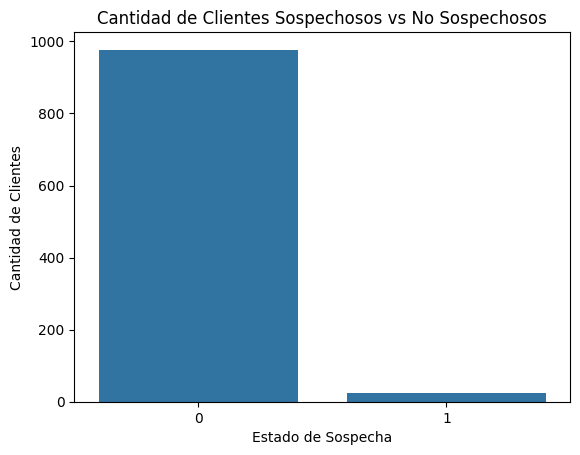

In [183]:
sns.barplot(x=cantClientesSos.index, y=cantClientesSos.values)

plt.xlabel('Estado de Sospecha')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes Sospechosos vs No Sospechosos')

plt.show()


C:\Users\brian\AppData\Local\Temp\ipykernel_31244\498566249.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes_por_edad = cuentaClienteSos.groupby(['RangoEdad', 'SuspiciousFlag']).size().unstack(fill_value=0)


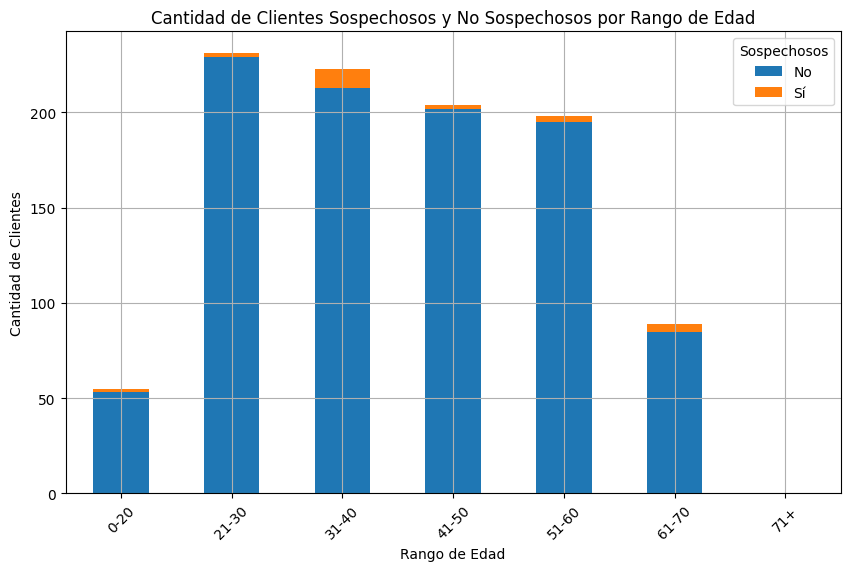

In [164]:
rangos_edad = [0, 20, 30, 40, 50, 60, 70, 100]

etiqueta_edad = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

cuentaClienteSos['RangoEdad'] = pd.cut(cuentaClienteSos['Age'], bins=rangos_edad, labels=etiqueta_edad, right=False)

clientes_por_edad = cuentaClienteSos.groupby(['RangoEdad', 'SuspiciousFlag']).size().unstack(fill_value=0)

clientes_por_edad.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes Sospechosos y No Sospechosos por Rango de Edad')
plt.legend(title='Sospechosos', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [165]:
clienteEstado = clienteSospechoso['SuspiciousFlag'].value_counts()
clienteEstado

SuspiciousFlag
0    977
1     23
Name: count, dtype: int64

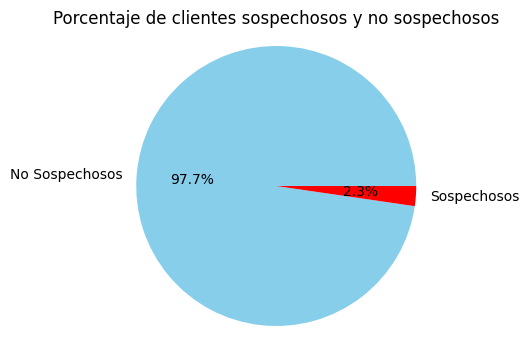

In [166]:

clienteEstado = clienteSospechoso['SuspiciousFlag'].value_counts()

plt.figure(figsize=(6, 4))
clienteEstado.plot(kind='pie', autopct='%1.1f%%', labels=['No Sospechosos', 'Sospechosos'], colors=['skyblue', 'red'])
plt.title('Porcentaje de clientes sospechosos y no sospechosos')
plt.ylabel('')
plt.axis('equal') 
plt.show()


In [167]:
cantFraudes = fraude['FraudIndicator'].value_counts()
cantFraudes

FraudIndicator
0    955
1     45
Name: count, dtype: int64

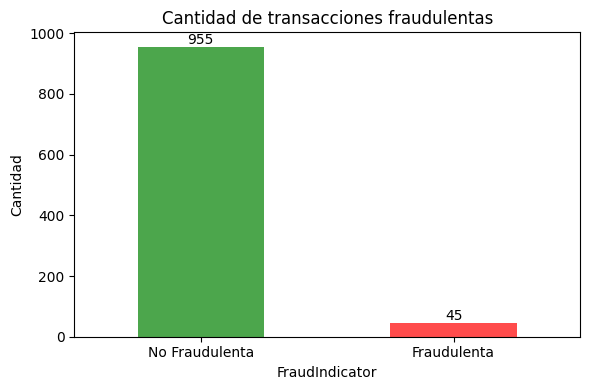

In [168]:
conteo_fraudes = fraude['FraudIndicator'].value_counts()

plt.figure(figsize=(6, 4))
bars = conteo_fraudes.plot(kind='bar', color=['green', 'red'], alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.title('Cantidad de transacciones fraudulentas')
plt.xlabel('FraudIndicator')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'], rotation=0)

plt.tight_layout()
plt.show()

In [105]:

df = tran_cat['Category'].value_counts()
df

Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64

In [169]:
fraudeCategoria = pd.merge(tran_cat, fraude, on='TransactionID')
cantFraudeCategoria = fraudeCategoria.groupby('Category')['FraudIndicator'].value_counts()
cantFraudeCategoria

Category  FraudIndicator
Food      0                 195
          1                   9
Online    0                 186
          1                  10
Other     0                 200
          1                  10
Retail    0                 183
          1                   9
Travel    0                 191
          1                   7
Name: count, dtype: int64

C:\Users\brian\AppData\Local\Temp\ipykernel_31244\1372364109.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  paleta = plt.cm.get_cmap('Set3')


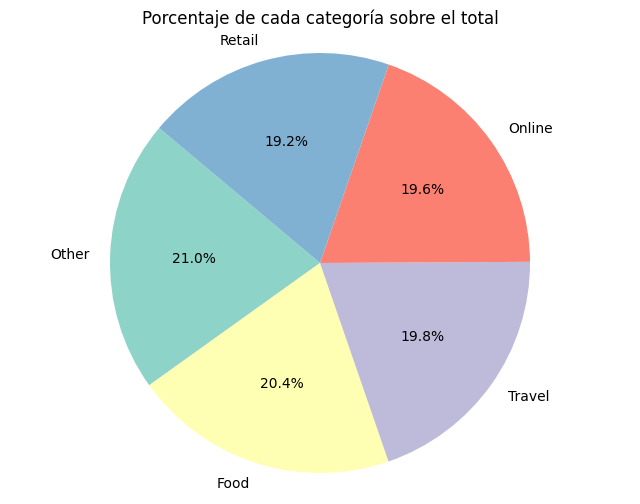

Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64

In [170]:
cantCategoria = len(tran_cat)
totalPorCategoria = tran_cat['Category'].value_counts()

porcentaje_por_categoria = (totalPorCategoria / cantCategoria) * 100
paleta = plt.cm.get_cmap('Set3')
plt.figure(figsize=(8, 6))
plt.pie(porcentaje_por_categoria, labels=porcentaje_por_categoria.index, autopct='%1.1f%%', startangle=140, colors=paleta.colors)
plt.title('Porcentaje de cada categoría sobre el total')
plt.axis('equal')  
plt.show()
totalPorCategoria

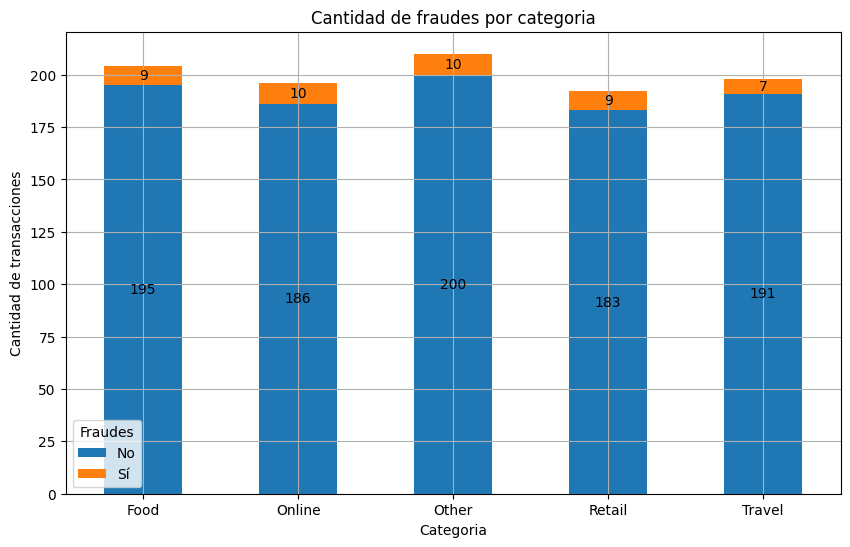

In [171]:
fraude_por_categoria = fraudeCategoria.groupby(['Category', 'FraudIndicator']).size().unstack(fill_value=0)

bars = fraude_por_categoria.plot(kind='bar', stacked=True, figsize=(10, 6))

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        bottom = bar.get_y()  
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bottom + height / 2, 
                 f'{int(height)}',
                 ha='center', va='center') 

plt.xlabel('Categoria')
plt.ylabel('Cantidad de transacciones')
plt.title('Cantidad de fraudes por categoria')
plt.legend(title='Fraudes', labels=['No', 'Sí'])
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


C:\Users\brian\AppData\Local\Temp\ipykernel_31244\944879250.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  paleta = plt.cm.get_cmap('Set3')


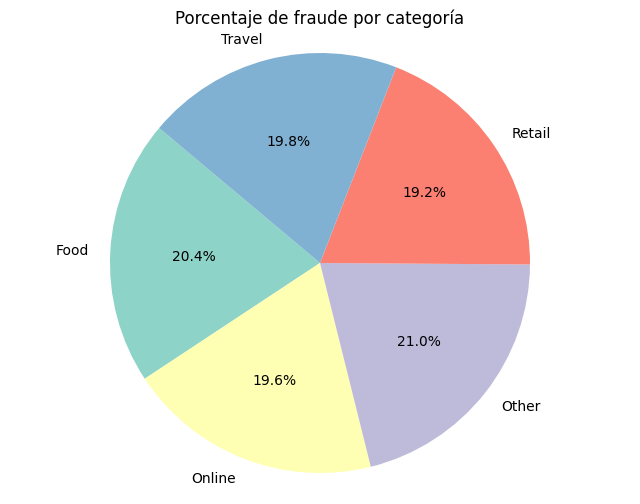

1000
Category
Food      20.4
Online    19.6
Other     21.0
Retail    19.2
Travel    19.8
Name: FraudIndicator, dtype: float64
Category
Food      204
Online    196
Other     210
Retail    192
Travel    198
Name: FraudIndicator, dtype: int64


In [183]:
fraudeCategoria = pd.merge(tran_cat, fraude, on='TransactionID')
cantFraudeCategoria = fraudeCategoria.groupby('Category')['FraudIndicator'].count()
cantFraudeCategoria


porcentaje_por_categoria = (cantFraudeCategoria / len(tran_cat)) * 100
paleta = plt.cm.get_cmap('Set3')
plt.figure(figsize=(8, 6))
plt.pie(porcentaje_por_categoria, labels=porcentaje_por_categoria.index, autopct='%1.1f%%', startangle=140, colors=paleta.colors)
plt.title('Porcentaje de fraude por categoría')
plt.axis('equal')  
plt.show()
print(len(tran_cat))
print(porcentaje_por_categoria)
print(cantFraudeCategoria)